## Support Vector Machines

Fernando Machado, 2022

Building a SVM for classifications using scikit-learn and the Radial Basis Function (RBF) Kernel. Our training data set contains data on clients who got a loan to buy a vehicle. The objective is to predict wheather a client is likely to default on their [vehicle loan payment or not](https://www.kaggle.com/datasets/meastanmay/nbfi-vehicle-loan-repayment-dataset).

SVMs work well with relatively small datasets and they tend to do not require much optimization

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [4]:
#let's check the dictionary on the data we got

dictionary = pd.read_csv('C:/Users/nando/Desktop/GitHub/svm/Data_Dictionary.csv')
dictionary

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for th...
3,Bike_Owned,Any bike owned by client (0 means No and 1 mea...
4,Active_Loan,Any other active loan at the time of aplicatio...
5,House_Own,Any house owned by client (0 means No and 1 me...
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied...


In [41]:
# The dataset came separarated between train and test sets. Bringing both to our environment

df_train = pd.read_csv('C:/Users/nando/Desktop/GitHub/svm/Train_Dataset.csv')
df_test = pd.read_csv('C:/Users/nando/Desktop/GitHub/svm/Test_Dataset.csv')

C:\Users\nando\AppData\Local\Temp\ipykernel_9376\1584586385.py:3: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('C:/Users/nando/Desktop/GitHub/svm/Train_Dataset.csv')
C:\Users\nando\AppData\Local\Temp\ipykernel_9376\1584586385.py:4: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('C:/Users/nando/Desktop/GitHub/svm/Test_Dataset.csv')


In [6]:
# Train set

df_train.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


#### Missing Data: Identifying

In [7]:
df_train.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [8]:
df_train['Car_Owned'].unique()

array([ 0.,  1., nan])

We see that we do have missing data on the training set. Let's check how many rows have a feature with null value

In [16]:
len(df_train)

121856

In [17]:
df_train[pd.isnull(df_train).any(axis=1)]

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121850,12136406,12150,0.0,0.0,1.0,0.0,0.0,78192,2383.65,Alone,...,Yes,Yes,XNA,NaN,0.678249,0.283712,0.0515,1581.0,2.0,0
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0


We see that almost 98% of the data has null values in some feature. I guess we'll be forced to deal with it and not ignore registers with nan values

### Treating Data for Scaling

To scale our data, we cannot have string or object columns, only numbers. So we have to transform all these features

In [27]:
#let's get the unique values for all columns, and then turn them into integer, to calculate the entropy

for col in df_train:
    if df_train[col].dtype == 'object' or df_train[col].dtype == 'bool':
        print(col, df_train[col].unique())

Client_Income ['6750' '20250' '18000' ... '13140' '9764.1' '12840.75']
Credit_Amount ['61190.55' '15282' '59527.35' ... '89138.7' '88885.8' '135534.6']
Loan_Annuity ['3416.85' '1826.55' '2788.2' ... 1736.55 3388.05 2989.35]
Accompany_Client ['Alone' 'Relative' 'Others' 'Kids' nan 'Partner' '##' 'Group']
Client_Income_Type ['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
Client_Education ['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad']
Client_Marital_Status ['M' 'W' 'S' nan 'D']
Client_Gender ['Male' 'Female' nan 'XNA']
Loan_Contract_Type ['CL' 'RL' nan]
Client_Housing_Type ['Home' 'Family' 'Office' 'Municipal' nan 'Rental' 'Shared']
Population_Region_Relative ['0.028663' '0.008575' '0.0228' '0.010556' '0.020713' '0.019101'
 '0.016612' '0.009175' '0.006008' '0.001417' '0.018634' '0.00963'
 '0.003541' '0.008068' '0.005144' '0.04622' '0.008866' nan '0.019689'
 '0.032561' '0.006852' '0.020246' '0.03

In [47]:
#let's create another dataframe in wich the values will be numeric

df_train['Client_Income'] = pd.to_numeric(df_train['Client_Income'], errors='coerce')
df_train['Credit_Amount'] = pd.to_numeric(df_train['Credit_Amount'], errors='coerce')
df_train['Loan_Annuity'] = pd.to_numeric(df_train['Loan_Annuity'], errors='coerce')
df_train['Loan_Annuity'] = pd.to_numeric(df_train['Loan_Annuity'], errors='coerce')
df_train['Population_Region_Relative'] = pd.to_numeric(df_train['Population_Region_Relative'], errors='coerce')
df_train['Age_Days'] = pd.to_numeric(df_train['Age_Days'], errors='coerce')
df_train['Employed_Days'] = pd.to_numeric(df_train['Employed_Days'], errors='coerce')
df_train['Registration_Days'] = pd.to_numeric(df_train['Registration_Days'], errors='coerce')
df_train['ID_Days'] = pd.to_numeric(df_train['ID_Days'], errors='coerce')
df_train['Score_Source_3'] = pd.to_numeric(df_train['Score_Source_3'], errors='coerce')

df_train['Accompany_Client'] = df_train['Accompany_Client'].replace(['Alone', 'Relative', 'Others', 'Kids', 'Partner', '##', 'Group'], [1,2,3,4,5,6,7])
df_train['Client_Income_Type'] = df_train['Client_Income_Type'].replace(['Commercial', 'Service', 'Retired', 'Govt Job', 'Student', 'Unemployed',
 'Maternity leave', 'Businessman'], [1,2,3,4,5,6,7,8])
df_train['Client_Education'] = df_train['Client_Education'].replace(['Secondary', 'Graduation', 'Graduation dropout', 'Junior secondary', 'Post Grad'], [1,2,3,4,5])
df_train['Client_Marital_Status'] = df_train['Client_Marital_Status'].replace(['M', 'W', 'S', 'D'], [1,2,3,4])
df_train['Client_Gender'] = df_train['Client_Gender'].replace(['Male', 'Female' , 'XNA'], [1,2,3])
df_train['Loan_Contract_Type'] = df_train['Loan_Contract_Type'].replace(['CL', 'RL'], [1,2])
df_train['Client_Housing_Type'] = df_train['Client_Housing_Type'].replace(['Home', 'Family', 'Office' ,'Municipal' , 'Rental', 'Shared'], [1,2,3,4,5,6])
df_train['Client_Occupation'] = df_train['Client_Occupation'].replace(['Sales', 'Realty agents', 'Laborers', 'Core', 'Drivers', 'Managers',
 'Accountants', 'High skill tech', 'Cleaning', 'HR', 'Waiters/barmen', 'Low-skill Laborers', 'Medicine', 'Cooking', 'Private service', 'Security', 'IT', 'Secretaries'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
df_train['Client_Permanent_Match_Tag'] = df_train['Client_Permanent_Match_Tag'].replace(['Yes', 'No'], [1,2])
df_train['Client_Contact_Work_Tag'] = df_train['Client_Contact_Work_Tag'].replace(['Yes', 'No'], [1,2])
df_train['Type_Organization'] = df_train['Type_Organization'].replace(['Self-employed', 'Government', 'XNA', 'Business Entity Type 3', 'Other' , 'Industry: type 3' ,'Business Entity Type 2' ,'Business Entity Type 1',
 'Transport: type 4' ,'Construction', 'Kindergarten', 'Trade: type 3',
 'Industry: type 2' ,'Trade: type 7' ,'Trade: type 2' ,'Agriculture',
 'Military', 'Medicine' ,'Housing', 'Industry: type 1', 'Industry: type 11',
 'Bank', 'School' ,'Industry: type 9' ,'Postal', 'University',
 'Transport: type 2', 'Restaurant', 'Electricity' ,'Police',
 'Industry: type 4', 'Security Ministries' ,'Services' ,'Transport: type 3',
 'Mobile', 'Hotel', 'Security' ,'Industry: type 7', 'Advertising', 'Cleaning',
 'Realtor' ,'Trade: type 6', 'Culture', 'Industry: type 5', 'Telecom',
 'Trade: type 1', 'Industry: type 12', 'Industry: type 8', 'Insurance',
 'Emergency', 'Legal Services', 'Industry: type 10', 'Trade: type 4',
 'Industry: type 6' ,'Transport: type 1', 'Industry: type 13', 'Religion',
 'Trade: type 5'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58])

#### We also have to treat nan values. I will arbitrarily treat them all as zeros

In [53]:
df_train = df_train.fillna(0)

In [54]:
#Now our data is finally transformed, let's check that out

df_train.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,1.0,...,1,1,1.0,0.568066,0.478787,0.000000,0.0186,63.0,0.0,0
1,12138936,20250.0,1.0,0.0,1.0,0.0,0.0,15282.00,1826.55,1.0,...,1,1,2.0,0.563360,0.215068,0.000000,0.0000,0.0,0.0,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,1.0,...,1,1,1.0,0.000000,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,1.0,...,1,1,3.0,0.000000,0.135182,0.631355,0.0000,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,1.0,...,1,1,4.0,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


### Split the Data into Dependent and Independent Variables

In [55]:
# X is the data we will use to make classifications
# y is the column of data that we want to predict.

X = df_train.drop('Default', axis=1).copy()
y = df_train['Default'].copy()

### Centering and Scaling

The Radial Basis Function (RBF) thare we are using with our SVM assumes that the data are centered and scaled. In other words, each column should have a mean value = 0 and a standart deviation = 1

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Building a Preliminary SVM

In [57]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


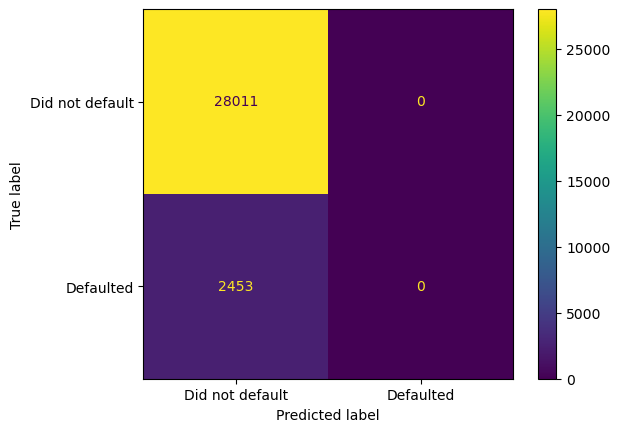

In [58]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['Did not default', 'Defaulted'])